# Lab 7 - Malware classificaction with Deep Learning
Sergio Marchena

UVG

In [93]:
import os
import pandas as pd
import numpy as np
import random
from IPython.display import display, Image
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

## Desarrollo

### 1. En el preprocesamiento debe mostrar cuantos ejemplares hay por cada familia. En base a estos datos debe determinar si considera pertinente prescindir de ejemplares que tengan pocas observaciones. 

In [94]:
Adalier = next(os.walk('malimg_paper_dataset_imgs/Adialer.C'))[2]
Agent = next(os.walk('malimg_paper_dataset_imgs/Agent.FYI'))[2]
Allaple = next(os.walk('malimg_paper_dataset_imgs/Allaple.A'))[2]
AllapleL = next(os.walk('malimg_paper_dataset_imgs/Allaple.L'))[2]
Alueron = next(os.walk('malimg_paper_dataset_imgs/Alueron.gen!J'))[2]
Autorun = next(os.walk('malimg_paper_dataset_imgs/Autorun.K'))[2]
C2LOP1 = next(os.walk('malimg_paper_dataset_imgs/C2LOP.gen!g'))[2]
C2LOP2 = next(os.walk('malimg_paper_dataset_imgs/C2LOP.P'))[2]
Dialplatform = next(os.walk('malimg_paper_dataset_imgs/Dialplatform.B'))[2]
Dontovo = next(os.walk('malimg_paper_dataset_imgs/Dontovo.A'))[2]
Fakerean = next(os.walk('malimg_paper_dataset_imgs/Fakerean'))[2]
Instantaccess = next(os.walk('malimg_paper_dataset_imgs/Instantaccess'))[2]
LolydaAA1 = next(os.walk('malimg_paper_dataset_imgs/Lolyda.AA1'))[2]
LolydaAA2 = next(os.walk('malimg_paper_dataset_imgs/Lolyda.AA2'))[2]
LolydaAA3 = next(os.walk('malimg_paper_dataset_imgs/Lolyda.AA3'))[2]
LolydaAT = next(os.walk('malimg_paper_dataset_imgs/Lolyda.AT'))[2]
Malex = next(os.walk('malimg_paper_dataset_imgs/Malex.gen!J'))[2]
Obfuscator = next(os.walk('malimg_paper_dataset_imgs/Obfuscator.AD'))[2]
Rbot = next(os.walk('malimg_paper_dataset_imgs/Rbot!gen'))[2]
Skintrim = next(os.walk('malimg_paper_dataset_imgs/Skintrim.N'))[2]
SwizzorE = next(os.walk('malimg_paper_dataset_imgs/Swizzor.gen!E'))[2]
SwizzorI = next(os.walk('malimg_paper_dataset_imgs/Swizzor.gen!I'))[2]
VB = next(os.walk('malimg_paper_dataset_imgs/VB.AT'))[2]
Wintrim = next(os.walk('malimg_paper_dataset_imgs/Wintrim.BX'))[2]
Yuner = next(os.walk('malimg_paper_dataset_imgs/Yuner.A'))[2]

print('Adalier.C: ', len(Adalier))
print('Agent.FYI: ', len(Agent))
print('Allaple.A: ',  len(Agent))
print('Allaple.L: ', len(AllapleL))
print('Alueron.gen!J: ', len(Alueron))
print('Autorun.K: ', len(Autorun))
print('C2LOP.P: ', len(C2LOP2))
print('Dialplatform.B: ', len(Dialplatform))
print('Dontovo.A: ', len(Dontovo))
print('Fakerean: ', len(Fakerean))
print('Instantaccess: ', len(Instantaccess))
print('LolydaAA1: ', len(LolydaAA1))
print('LolydaAA2: ', len(LolydaAA1))
print('LolydaAA3: ', len(LolydaAA1))
print('LolydaAT: ', len(LolydaAT))
print('Malex: ', len(Malex))
print('Obfuscator: ', len(Obfuscator))
print('Rbot: ', len(Rbot))
print('Skintrim: ', len(Skintrim))
print('SwizzorE: ', len(SwizzorE))
print('SwizzorI: ', len(SwizzorI))
print('VB.AT: ', len(VB))
print('Wintrim: ', len(Wintrim))
print('Yuner: ', len(Yuner))

Adalier.C:  122
Agent.FYI:  116
Allaple.A:  116
Allaple.L:  1591
Alueron.gen!J:  198
Autorun.K:  106
C2LOP.P:  146
Dialplatform.B:  177
Dontovo.A:  162
Fakerean:  381
Instantaccess:  431
LolydaAA1:  213
LolydaAA2:  213
LolydaAA3:  213
LolydaAT:  159
Malex:  136
Obfuscator:  142
Rbot:  158
Skintrim:  80
SwizzorE:  128
SwizzorI:  132
VB.AT:  408
Wintrim:  97
Yuner:  800


### 2. Plotee las imágenes de los ejemplares de malware.

In [95]:
# Se hace plot a la muestra de imagenes con label 

def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [96]:
from keras.preprocessing.image import ImageDataGenerator
dir = 'malimg_paper_dataset_imgs'
batches = ImageDataGenerator().flow_from_directory(directory=dir, target_size=(64,64), batch_size=10000)
imgs, labels = next(batches)

Found 9339 images belonging to 25 classes.


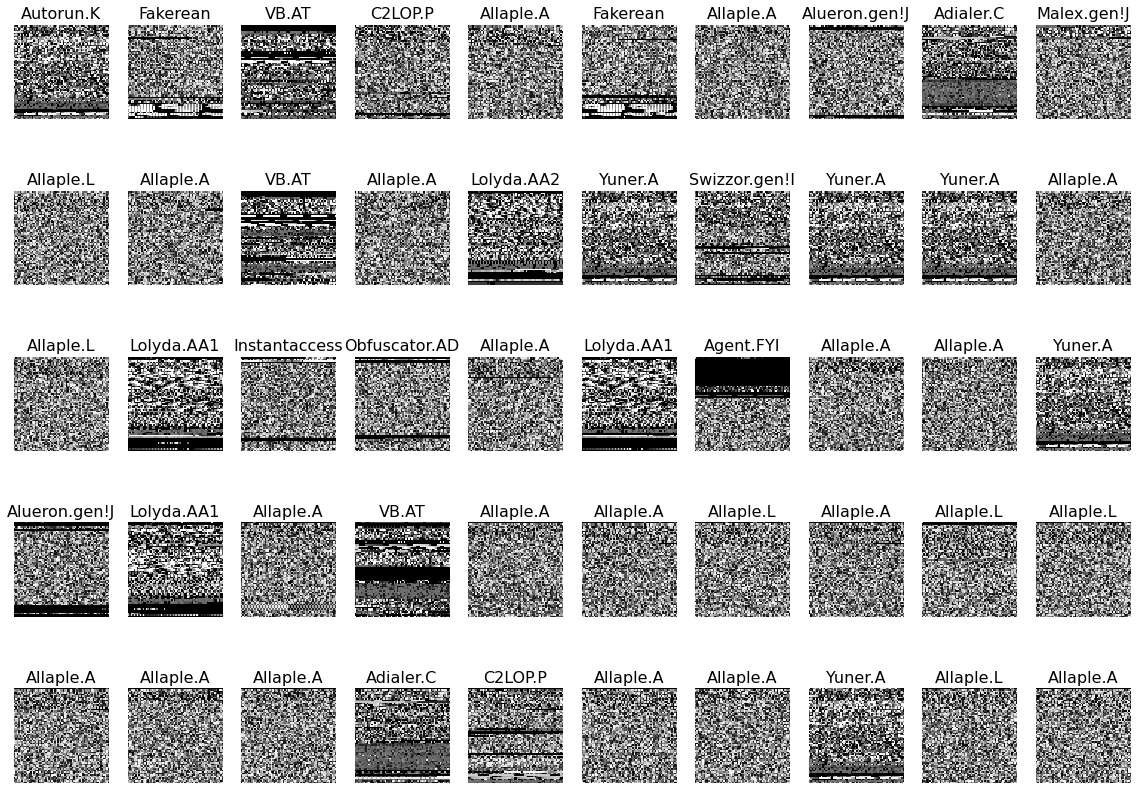

In [97]:
plots(imgs, titles = labels)

### 3. Utilizando  Keras  y  Tensorflow  construya  una  red  neuronal  con  las  capas,  funciones  de activación y el optimizador que considere conveniente.

In [98]:
import keras
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Flatten

model = models.Sequential()
model.add(layers.Conv2D(30, kernel_size=(3, 3),activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(15, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='softmax'))

### 4. Muestre el resumen del modelo. 

In [99]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 30)        840       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 31, 31, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 15)        4065      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 15)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2940)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

### 5. Divida el dataset en un 70% entrenamiento y un 30% de pruebas. 

In [100]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

print('x_train:', x_train.shape)
print('x_test: ', x_test.shape)

print('y_train:', x_train.shape)
print('y_test: ', x_test.shape)

x_train: (6537, 64, 64, 3)
x_test:  (2802, 64, 64, 3)
y_train: (6537, 64, 64, 3)
y_test:  (2802, 64, 64, 3)


### 6. Entrene el modelo con el número de épocas que considere conveniente. 

In [101]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [102]:
hisotry = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2022-05-08 02:49:45.259444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


205/205 [==============================] - ETA: 0s - loss: 1.2641 - accuracy: 0.6162

2022-05-08 02:49:50.534004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


205/205 [==============================] - 6s 28ms/step - loss: 1.2641 - accuracy: 0.6162 - val_loss: 0.7102 - val_accuracy: 0.8283
Epoch 2/10
205/205 [==============================] - 6s 31ms/step - loss: 0.3694 - accuracy: 0.8975 - val_loss: 0.2768 - val_accuracy: 0.9308
Epoch 3/10
205/205 [==============================] - 6s 30ms/step - loss: 0.2013 - accuracy: 0.9414 - val_loss: 0.2190 - val_accuracy: 0.9318
Epoch 4/10
205/205 [==============================] - 6s 27ms/step - loss: 0.1435 - accuracy: 0.9593 - val_loss: 0.1877 - val_accuracy: 0.9415
Epoch 5/10
205/205 [==============================] - 6s 27ms/step - loss: 0.1017 - accuracy: 0.9703 - val_loss: 0.1638 - val_accuracy: 0.9450
Epoch 6/10
205/205 [==============================] - 6s 27ms/step - loss: 0.0873 - accuracy: 0.9729 - val_loss: 0.2236 - val_accuracy: 0.9400
Epoch 7/10
205/205 [==============================] - 6s 29ms/step - loss: 0.0803 - accuracy: 0.9763 - val_loss: 0.1754 - val_accuracy: 0.9472
Epoch 8/10

### 7. Muestre las métricas de su modelo.

88/88 - 1s - loss: 0.1542 - accuracy: 0.9536 - 697ms/epoch - 8ms/step
Accuracy: 95.36


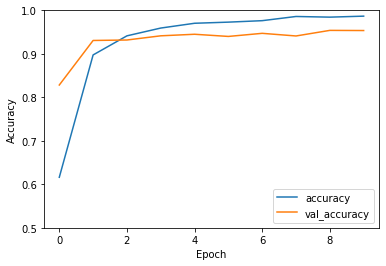

In [103]:
plt.plot(hisotry.history['accuracy'], label='accuracy')
plt.plot(hisotry.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('Accuracy: %0.2f' %(test_acc*100))

### 8. Evalúe el modelo con el dataset de pruebas y muestre las métricas obtenidas. Discuta los resultados obtenidos. 

In [108]:
y_predict = np.argmax(model.predict(x_test), axis=-1)
y_test = np.argmax(y_test, axis=1)

In [109]:
from sklearn import metrics

c_matrix = metrics.confusion_matrix(y_test, y_predict)

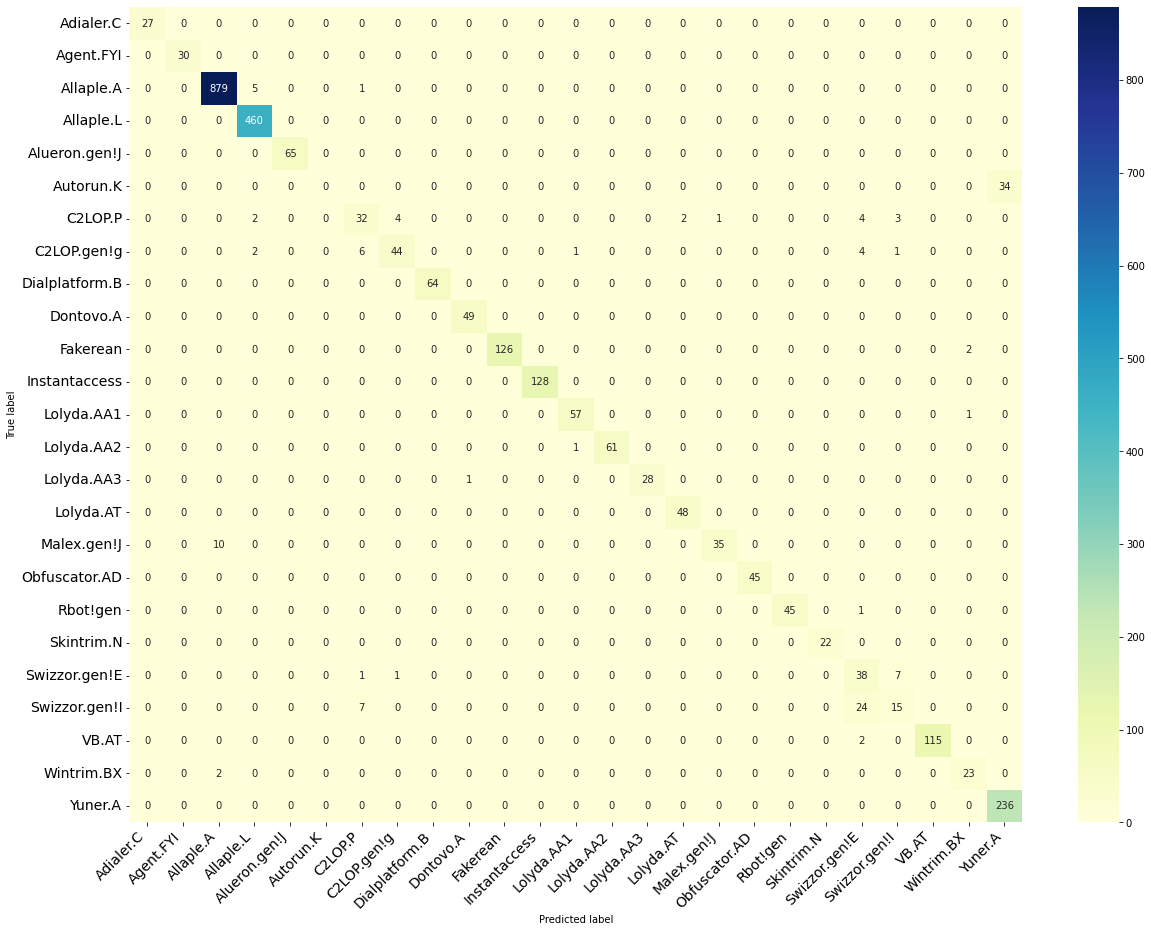

In [113]:
import seaborn as sns

def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=10):
    df_cm = pd.DataFrame( confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d",  cmap='YlGnBu')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names= batches.class_indices.keys()


confusion_matrix(c_matrix, class_names, figsize = (20,15), fontsize=14)

El modelo predice correctamente con un 95% de exactitud. Lo que se puede notar es que hay pocas confusiones que solo ocurren una 1 a 4 veces como por ejemplo los C2LOP con Allaple.L. Ademas se puede notar que Autorun.K se confunde mucho con Yuner.A. Y que Swizzor.gen!I se confunde con C2LOP.P. Malex.gen!J tambien se confunde mucho con Allaple.A